In [1]:
#This notebook is used to answer the Questions #1
# Which neighborhood are most popular for Airbnb Locations? (Where are most of the Airbnb locations being offered)?
# Potential for improvement could be to display the percentage distribution in the form of a map of Berlin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

listing = pd.read_csv('listings.csv') #reading the listings dataset in a datafram called 'listing'
listing.head() #displaying the enteries of the dataframe 'listing'

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,cafeheaven Pberg/Mitte,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,60,18,2018-11-11,0.24,1,251
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.14,1,344
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.35,1,317
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,128,2019-10-21,1.08,1,20
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,3,266,2019-11-09,2.13,2,30


In [3]:
listing.columns[listing.isnull().any()] #Column names with null or NAN values

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [4]:
listing['neighbourhood_group'].isnull().mean() #To check if 'neighbourhood_group' has any null or NAN values or not. Mean of 0.0 means it has no missing (null or NAN) value

0.0

Text(0.5,1,'Total number of Airbnb properties offered in different neighborhoods in Berlin')

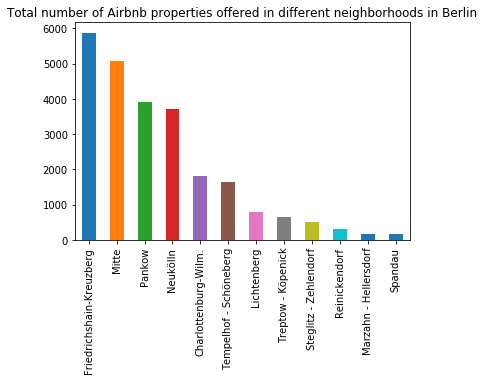

In [5]:
listing['neighbourhood_group'].value_counts().plot(kind='bar') # Plot of Airbnb in different neighborhood
plt.title('Total number of Airbnb properties offered in different neighborhoods in Berlin') #assigning title to our plot

Text(0.5,1,'Percentage of Airbnb properties offered in different neighborhoods in Berlin')

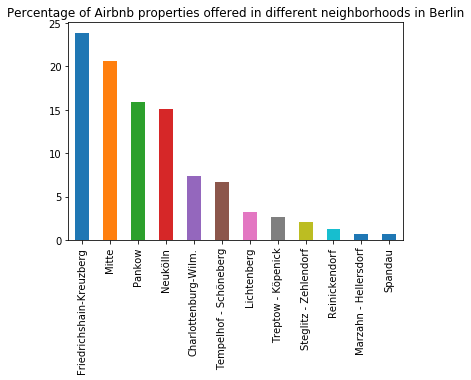

In [6]:
popular_neighborhood = (listing['neighbourhood_group'].value_counts(normalize = True) * 100).plot(kind='bar') #This line of code is used to plot the percentage of different neighbourhood groups in Berlin. 'normalize=True' in value_counts() returns the values as percentages. 

plt.title('Percentage of Airbnb properties offered in different neighborhoods in Berlin') # Percentage of Airbnb in different neighborhood


In [7]:
listing['neighbourhood_group'].value_counts(normalize=True) #Displaying different typees neighbourhood groups as a percentage. 

Friedrichshain-Kreuzberg    0.238713
Mitte                       0.206378
Pankow                      0.158546
Neukölln                    0.150573
Charlottenburg-Wilm.        0.073375
Tempelhof - Schöneberg      0.067111
Lichtenberg                 0.031969
Treptow - Köpenick          0.026885
Steglitz - Zehlendorf       0.020621
Reinickendorf               0.013138
Marzahn - Hellersdorf       0.006426
Spandau                     0.006264
Name: neighbourhood_group, dtype: float64

In [8]:
# So from the above plots, we can conclude that neighbourhood groups like 'Friedrichshain-Kreuzberg', 'Mitte', 'Pankow' and 'Neukölln' are very popular. These are the neighbourhoods where most of the Airbnb locations are being offered. 
# Almost 75% of all the Airbnb hostings are located in these four neighbourhoods. 
# So we can conclude that if you are planning to visit Berlin and you are planning to stay in Airbnb accomodation then you can 
# look for one of the accomodations located in these neighbourhood groups. 

In [9]:
#Now we will answer Question #2
# What is the preferred type of property of Airbnb in Berlin based on the price distribution per 'room_type' of Airbnb in Berlin.
# Here in this question we will show the comparison between plotting the mean and the median value.

In [10]:
listing['room_type'].isnull().mean() #Checking if the 'room_type' column contains any NaN values

0.0

In [11]:
different_room_types = listing['room_type'].value_counts() #Checking no. of different type of rooms types in Airbnb Berlin
different_room_types

Entire home/apt    12381
Private room       11616
Hotel room           295
Shared room          294
Name: room_type, dtype: int64

In [12]:
listing['price'].idxmax() #print the index number of the max value in column 'price' (use just .max() to print only the max value in the column)

5760

In [13]:
print(listing.loc[[5760]]) #Code to print any particular index number (print entire row at that index number)

           id                              name   host_id host_name  \
5760  9651871  Über den Dächern Berlins Zentrum  49896804       NaN   

       neighbourhood_group        neighbourhood  latitude  longitude  \
5760  Charlottenburg-Wilm.  Düsseldorfer Straße  52.49798   13.33444   

            room_type  price  minimum_nights  number_of_reviews last_review  \
5760  Entire home/apt   9000             100                  1  2016-01-02   

      reviews_per_month  calculated_host_listings_count  availability_365  
5760               0.02                               1                 0  


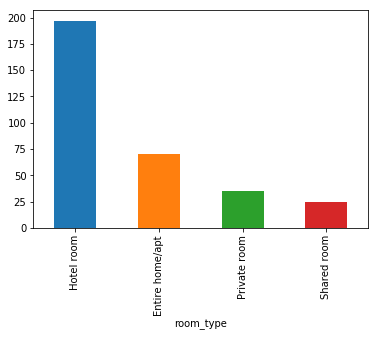

In [14]:
Berlin_Median_plot = listing.groupby('room_type').price.median().sort_values(ascending=False).plot(kind='bar')
Berlin_Median_plot
# This plot shows the median price of room type of Airbnb in Berlin

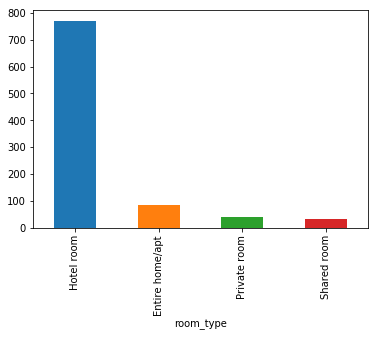

In [15]:
Berlin_Mean_plot = listing.groupby('room_type').price.mean().sort_values(ascending=False).plot(kind='bar')
Berlin_Mean_plot
# This plot shows the mean price of room type of Airbnb in Berlin

In [16]:
Berlin_Median_values= listing.groupby('room_type').price.median().sort_values(ascending=False)
Berlin_Median_values

room_type
Hotel room         197
Entire home/apt     70
Private room        35
Shared room         25
Name: price, dtype: int64

In [17]:
Berlin_Mean_values = listing.groupby('room_type').price.mean().sort_values(ascending=False)
Berlin_Mean_values

room_type
Hotel room         770.037288
Entire home/apt     85.973912
Private room        41.886794
Shared room         34.214286
Name: price, dtype: float64

In [18]:
# So from the above comparison we can see that Mean and Median can have different effects on the overall values. 
# Sometimes taking the mean of all the values to represent the average might be a good idea and sometimes taking Median is a better approach.
# From this example, we saw that when we take the Mean of all the price values of room_type 'Hotel room', it shows a very high number because there
# there will be Hotels which costs 2000 per night. These kinds of values are outliers and they disturb the overall outcome and that is why we saw a very high mean value.
# On the other hand taking Median proved to be a better approach because it sorts all the values in the ascending manner and takes the middle value, which in this case, is a better representation of the average price.
# So to conclude, we can say that based on the scenario, we have to decide what is a better aproach to represent the average.

In [19]:
#Now we will answer Question #3
# What features influence the price. Predict the price using ML model.

# In this notebook, we will create a Linear Regression Model to predict the features that influence the price. 
# We want to know what features are directly related to the price. 
# We will also perform data cleaning and data wrangling operations before the data can be fed into the model for prediction.

In [20]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the features you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Create X as all the columns that are not the price column and that are numeric
    3. Create y as the price column
    4. Drop the 'id', 'name', 'host_id', 'host_name','neighbourhood', 'latitude', 'longitude', 'price',
                'last_review','calculated_host_listings_count', 'availability_365' columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    7. Return X and y
    '''
    
    #Drop all the rows with no price
    df = df.dropna(subset = ['price'], axis = 0)
    y = df['price']
    
    #Drop columns that we do not want to consider 
    df = df.drop(['id', 'name', 'host_id', 'host_name',
                  'neighbourhood', 'latitude', 'longitude', 'price',
                  'last_review'], axis = 1)
    
    
    #Fill the mean in the columns where we have some NaN values.
    num_vars = df.select_dtypes(include = ['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace = True)
        
        
    #Fill Dummy variables for the categorical columns. 
    cat_vars = df.select_dtypes(include = ['object']).copy().columns
    for var in cat_vars:
        df = pd.concat([df.drop(var, axis = 1), pd.get_dummies(df[var], prefix =var, prefix_sep='_', drop_first=False)], axis = 1)
        
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listing) 

In [21]:
#Create Training and Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Instantiat the Model
lm_model = LinearRegression(normalize=False)

In [23]:
#Fit the Model

lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#Predictions
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [25]:
#Scoring the Model

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [26]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.13998550844860203.  The rsquared on the test data was 0.12438280041842009.


In [27]:
# From the above results of 'rsquared' values, we can see that our model is not predicting the outcomes in the most appropriate way.
# rsquared of almost 13% on both Training and Test datasets shows the limitations of our model. One of the main reasons for this
# is that I have used very few features to predict the price. If i Had used more features, i could have achieved better results. 
# The data set i used for my project is the summarized version and contains only few columns. During data cleaning, i dropped 
# certain columns that were not useful. 

In [28]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the results
coef_df

,est_int,coefs,abs_coefs
18,room_type_Hotel room,542.686719,542.686719
20,room_type_Shared room,-204.264646,204.264646
19,room_type_Private room,-189.502010,189.502010
17,room_type_Entire home/apt,-148.920062,148.920062
13,neighbourhood_group_Spandau,-43.479768,43.479768
15,neighbourhood_group_Tempelhof - Schöneberg,32.421358,32.421358
5,neighbourhood_group_Charlottenburg-Wilm.,30.508820,30.508820
8,neighbourhood_group_Marzahn - Hellersdorf,-16.139100,16.139100
7,neighbourhood_group_Lichtenberg,-12.915212,12.915212
9,neighbourhood_group_Mitte,12.097601,12.097601


In [29]:
# From the above results, we can clearly see that the variable/feature 'room_type_Hotelroom' has the highest influence on the price.
# This means that 'room_type' will effect the price heavly either in the positive or negative manner that is, it will predict a higher or lower price.
# depending on the type of the room. If the 'room_type' is Hotel room then our model will predict ahigher price where as if the 'room_type' is shared room, it will predict
# a lessser price. 
# Anopther factor that effects the price, is the 'neighbourhood_group'. Depending on the type of 'neighbourhood_group' price will predicted either higher or lower.
# Neighbourhoods like 'neighbourhood_group_Tempelhof - Schöneberg' will have a positive effect on the prediction of the price and
# Neighbourhood like 'neighbourhood_group_Neukölln' will have a negative effect and our model will predict a lesser price.
# It can also be seen that other features like, 'minimum_nights', 'availability_365' and 'number_of_reviews' have very less effect on the prediction.

# This is the benfit of looking into the coefficients of the model, it tells us which variables/features matter the most in predicting the outcome.
# Obviously, if our model had better rsquared results, the coefficients distribution would have been different but the most important thing
# is to actually understand why the model behaves in a certain way and what factors can be modified to improve the performance of our model